<a href="https://colab.research.google.com/github/priteshnaikade21/DS_PY-Writeups_2102625/blob/main/Exp04_notebook_2102625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment No : 04

##**Aim :** 
Learn use of maplotlib library as visualisation tool in data science pipeline to create contour plots, histograms and box plots.

## Performance : 

[Students need to execute each and every cell in this section and note the output of the same. Once done they have to answer Questions mentioned in review section]


### Density and Contour plots
Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.

There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.

We will see examples of this type of plot in section below

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

<ipython-input-1-9721c6b74aa7>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
# A 3D function to plot 

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.

The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.

Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

In [3]:
# x is set of 50 values between 0 and 5 
# x is set of 40 values between 0 and 5

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

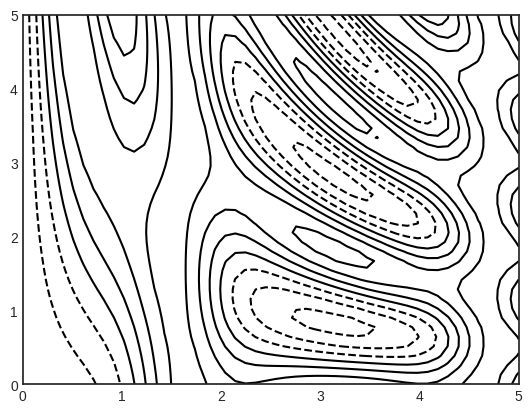

In [4]:
plt.contour(X, Y, Z, colors='black');

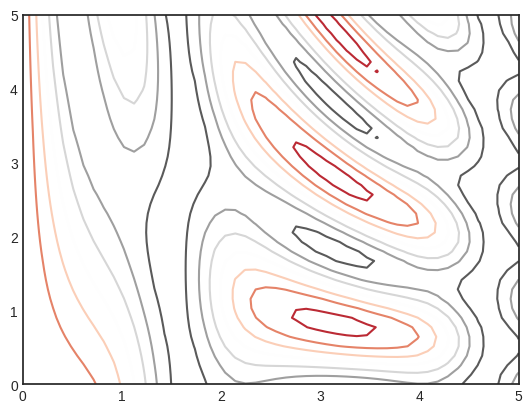

In [5]:
plt.contour(X, Y, Z, cmap='RdGy');

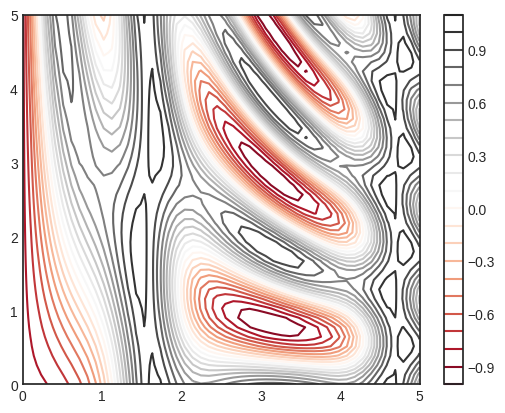

In [6]:
plt.contour(X, Y, Z, 20, cmap='RdGy');
plt.colorbar();

Answer Following Questions : 
1.   Explain what are the changes you observe in contour plots above 3 code cells ?
2.   What is size of X, Y and Z  respectively ?
3.   How does colorbar() method help in contour plot.

**3)Explain what are the changes you observe in contour plots above 3 code cells ?**

Exmaple no 1 


plt.contour(X, Y, Z, colors='black') is a function call in Python's Matplotlib library that creates a contour plot of the data in the Z array, with the X and Y arrays specifying the coordinates of the points where the Z values are measured.
In a contour plot, the Z values are represented by isolines, or contours, which are lines that connect points of equal Z value. The colors parameter sets the color of the isolines; in this case, colors='black' specifies that the isolines should be drawn in black.

Example no 2

Similar to the previous example, a contour plot is created where Z values are represented by isolines or contours. However, the cmap parameter has been set to 'RdGy', which specifies the color map to use for the isolines.

Example no 3

The code plt.contour(X, Y, Z, 20, cmap='RdGy') creates a contour plot of the data in the Z array with the X and Y arrays specifying the coordinates of the points where the Z values are measured. The 20 argument specifies the number of contours to draw, dividing the range of Z values into 20 equally spaced levels. The cmap='RdGy' argument specifies the 'RdGy' colormap to use for the isolines as previously mentioned.

The code plt.colorbar() adds a colorbar to the contour plot created by the previous command. A colorbar is a graphical representation of the relationship between the colors in the plot and the numerical values they represent. The colorbar typically includes a scale indicating the range of values represented by each color. In this case, the colorbar will show the range of values in the Z array, with the colors corresponding to the isolines in the contour plot.


**2)What is size of X, Y and Z respectively ?**

In [7]:

size1=x.size
print(size1)
print("_____________________________________________________")

size2=y.size
print(size2)
print("_____________________________________________________")
print(Z)
size3=Z.size
print(size3)

50
_____________________________________________________
40
_____________________________________________________
[[-0.83907153 -0.83470697 -0.8216586  ...  0.8956708   0.68617261
   0.41940746]
 [-0.83907153 -0.8275558  -0.80744041 ...  0.93467448  0.77467433
   0.55894214]
 [-0.83907153 -0.820263   -0.79266951 ...  0.98503397  0.88847607
   0.73757604]
 ...
 [-0.83907153 -0.48696962 -0.02692065 ...  0.98525345  0.79584263
   0.46799565]
 [-0.83907153 -0.47558005 -0.00130271 ...  0.93488414  0.6993547
   0.37933079]
 [-0.83907153 -0.46410908  0.02431613 ...  0.89579384  0.65690314
   0.40107702]]
2000


**3How does colorbar() method help in contour plot?**
-->

The colorbar() method is a function in Python's matplotlib library that is used to display a colorbar for a given plot. In the case of contour plots, the colorbar() method helps to interpret the color mapping of the contour plot.

Contour plots are used to represent 3-dimensional data on a 2-dimensional surface by using contour lines to represent constant values of the data. The contour lines are colored based on the values they represent, which can range from a minimum to a maximum value.

The colorbar() method creates a colorbar legend that maps the colors in the contour plot to the corresponding values they represent. The colorbar can be displayed horizontally or vertically, and it can be positioned either inside or outside the plot.

Without the colorbar() method, it can be difficult to interpret the colors in a contour plot and what they represent. With the colorbar() method, it becomes much easier to understand the mapping of the colors to the values represented in the plot.


### Creating Smoother Contour Plots
One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.

This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

The following code shows how to perform this:

Things to remember while using ``imshow()``:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

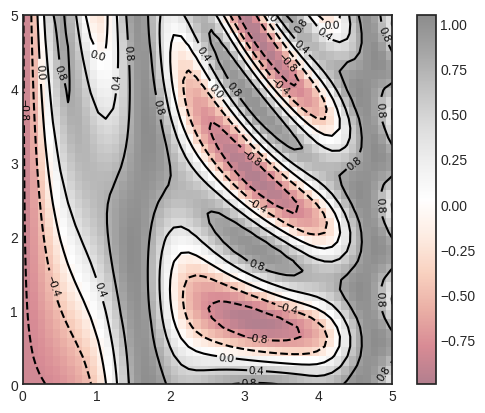

In [8]:
contours = plt.contour(X, Y, Z, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

Answer Following Questions : 
1.   What does alpha parameter do ?
2.   What does clabel method does ?
3.   Recreate above code block after, changing parameter 4 in contour fuction to 5 from 3. Explain what change you see in the plot.  


**1)What does alpha parameter do ?**

The alpha parameter is a parameter in Matplotlib that controls the opacity or transparency of a plot element. It is a value between 0 and 1, where 0 is completely transparent and 1 is completely opaque.

The alpha parameter can be used with most plot types in Matplotlib, including scatter plots, line plots, bar plots, and contour plots, among others. When applied to a plot element, the alpha parameter changes the transparency of that element. For example, if you create a scatter plot of points and set the alpha parameter to 0.5, the points in the plot will be partially transparent, allowing you to see overlapping points.

**2)What does clabel method does ?**

The clabel method in Matplotlib is used to add labels to the contour lines of a contour plot.

After creating a contour plot using the contour method, you can call the clabel method to add text labels to the contour lines. The clabel method takes the contour plot object as its first argument, and can also take several optional arguments to customize the appearance of the labels, such as fontsize, colors, and fmt.





**3)Recreate above code block after, changing parameter 4 in contour fuction to 5 from  Explain what change you see in the plot.?**


By changing the number of contours from 3 to 5 in the contour function call, we increase the number of contour lines that are drawn on the plot. This will result in more detailed contours that better represent the shape of the underlying distribution.

Specifically, the contour lines will now divide the range of Z values into five levels instead of three, resulting in a more finely grained visualization of the distribution.

So the overall change we see after modifying the code is an increase in the level of detail in the contour plot.

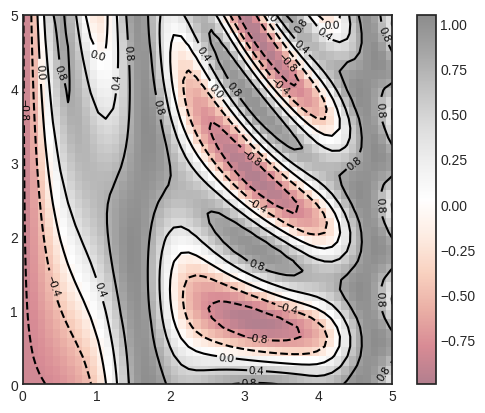

In [9]:
contours = plt.contour(X, Y, Z, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

### Histogram, Binning Plots

A histogram is a graphical representation of a grouped frequency distribution with continuous classes. It is an area diagram and can be defined as a set of rectangles with bases along with the intervals between class boundaries and with areas proportional to frequencies in the corresponding classes. In such representations, all the rectangles are adjacent since the base covers the intervals between class boundaries. The heights of rectangles are proportional to corresponding frequencies of similar classes and for different classes, the heights will be proportional to corresponding frequency densities.

In other words, a histogram is a diagram involving rectangles whose area is proportional to the frequency of a variable and width is equal to the class interval.

The histogram graph is used under certain conditions. They are:



*   The data should be numerical.
*   A histogram is used to check the shape of the data distribution. 
*   Used to check whether the process changes from one period to another.
*   Used to determine whether the output is different when it involves two or more processes.
*   Used to analyse whether the given process meets the customer requirements.



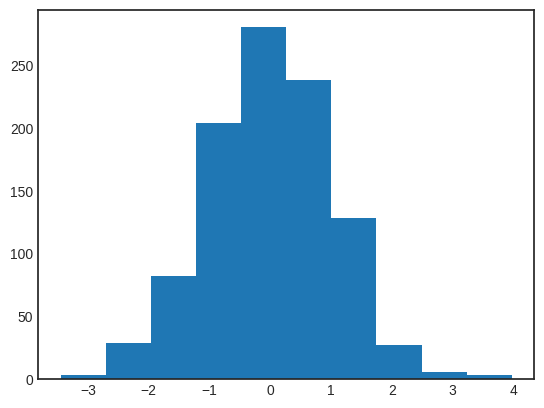

In [10]:
# How to plot histogram
data = np.random.randn(1000)
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

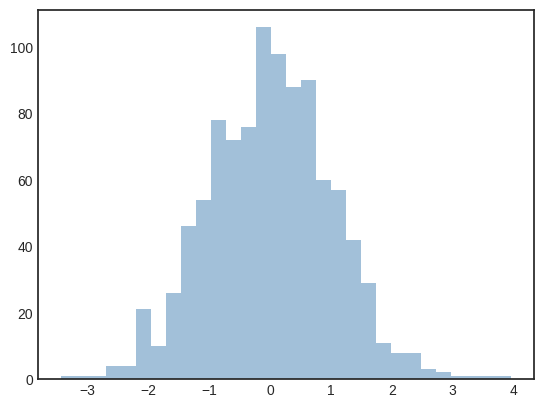

In [11]:
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

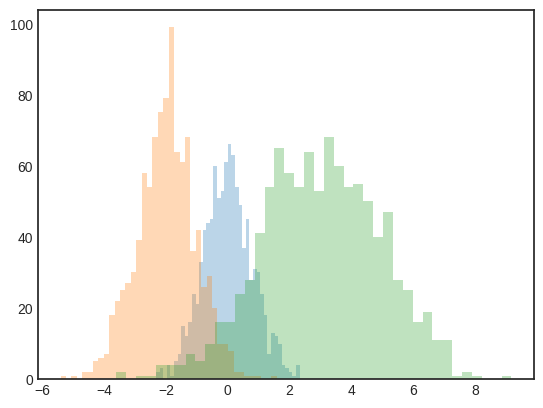

In [12]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [13]:
#Only storing histogram bin frequencies without ploting it
counts, bin_edges = np.histogram(data, bins=5)
print(counts,bin_edges)

[ 32 286 518 155   9] [-3.44584523 -1.96284432 -0.4798434   1.00315751  2.48615842  3.96915933]


### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

In [14]:
# Create 2 Variable normally distributed data sets with 10000 
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

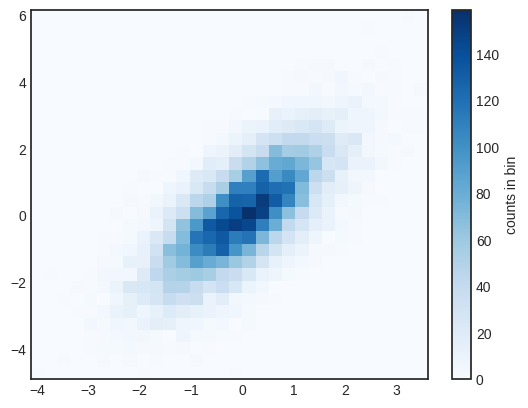

In [15]:
#Using 2d Histogram plot
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [16]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

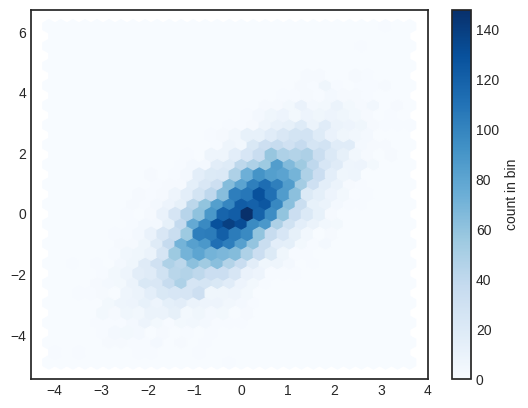

In [17]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

Questions:

1.  What is role of bins parameter in histogram plot? 
2.  Create a set of 10000 uniform random samples and store it in variable named *norm_data*. Draw histograms of *norm_data* with following bin counts 5, 50, 500, 5000.
3.  Explain your observations in text box of above step. 

**1)What is role of bins parameter in histogram plot?**


In a histogram plot, the bins parameter specifies the number of bins or intervals into which the data is divided.

Each bin represents a range of values in the dataset, and the number of data points falling within that range is represented by the height of the bin. By changing the number of bins, we can control the level of detail in the histogram and how well it captures the distribution of the data.

If we set the number of bins to a low value, the histogram will be less detailed, with large bins that combine a wide range of values. This may mask some of the finer details of the distribution, but it can also make it easier to see the overall shape of the distribution.

**2)Create a set of 10000 uniform random samples and store it in variable named norm_data. Draw histograms of norm_data with following bin counts 5, 50, 500, 5000?**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
norm_data = np.random.uniform(size=10000)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()


bin_counts = [5, 50, 500, 5000]


for i, ax in enumerate(axes):

    bins = bin_counts[i]
    
    
    ax.hist(norm_data, bins=bins)
    ax.set_title(f'Bin Count: {bins}')


fig.suptitle('Histograms of Uniform Random Samples')
plt.tight_layout()
plt.show()


This code first creates an array of 10000 uniform random samples using the np.random.uniform() function, and stores it in the norm_data variable.

Then, it sets up a 2x2 grid of subplots using the subplots() function, and flattens the resulting array of axes into a 1D array for convenience.

It then defines a list of four bin counts to use when plotting the histograms, and iterates over the list to plot a histogram with each bin count on a separate subplot.

Finally, it adds a title to the overall plot using suptitle(), and displays the plot using show().

When you run this code, you should see a figure with four subplots, each showing a histogram of the uniform random samples with a different bin count. The histograms with fewer bins (e.g. 5) will have larger bins that capture a wider range of values, while the histograms with more bins (e.g. 5000) will have smaller bins that capture more of the variation in the data.

### Ploting from a CSV File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Path to file /content/drive/MyDrive/AIDS1 /notebooks/data/california_cities.csv

import pandas as pd
cities = pd.read_csv('/content/drive/MyDrive/california_cities.csv')
import numpy as np
import matplotlib.pyplot as plt

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Multiple Subplots
Sometimes it is helpful to compare different views of data side by side. Matplotlib has the concept of *subplots* : groups of smaller axes that can exist together within a single figure.

These subplots might be insets, grids of plots, or other more complicated layouts. 

In [ ]:
plt.style.use('seaborn-white')
import numpy as np

### ``plt.axes``: Subplots by Hand (Coding)

The most basic method of creating an axes is to use the ``plt.axes`` function. By default this creates a standard axes object that fills the entire figure.

``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent 
``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.650, 0.650, 0.2, 0.2]) #inset axes

In [ ]:
#creating subplot using fig.add_axes
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.

The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.

As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

In [ ]:
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')


In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

### ``plt.subplots``: The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.


The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

In [ ]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In [ ]:
# An example of Flexible grid arrangement
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()


In [ ]:
import matplotlib as mpl
# An example of Complex Plotting
births = pd.read_csv('/content/drive/MyDrive/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

### Boxplot

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. 

In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.



In [ ]:
#Exmple of Box plot for some random data sets
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()


Questions:

**1. What is boxplot ?**


A boxplot, also known as a box-and-whisker plot, is a graphical representation of a dataset's distribution using five summary statistics: the minimum value, the first quartile, the median, the third quartile, and the maximum value.

The box in the plot represents the middle 50% of the data, with the lower boundary of the box being the first quartile and the upper boundary of the box being the third quartile. The line inside the box represents the median of the data. The "whiskers" extending from the box represent the range of the data outside the box, with outliers plotted as individual points. The whiskers may have different lengths depending on the method used to calculate them, but typically they extend to the minimum and maximum values within a specified range of the interquartile range.

Boxplots are useful for visualizing the spread and central tendency of data, as well as identifying outliers. They are commonly used in statistics, data analysis, and quality control.

2. What information do we get from a box plot?

The range of the data: The minimum and maximum values of the dataset are shown as the ends of the whiskers.

The interquartile range (IQR): The IQR is the range of the middle 50% of the data, and it is represented by the length of the box.

The median: The median value of the dataset is shown as a line inside the box.

The skewness of the data: By examining the position of the median relative to the edges of the box, you can get a sense of whether the data is skewed to the left or right.

The presence of outliers: Outliers are shown as individual points outside the whiskers, and can provide insights into the nature of the data or potential problems with data collection.

3. How is minimum and maximum whisker's marked in a box plot ?


The minimum whisker extends from the bottom of the box to the smallest data point that is not an outlier. It is typically defined as the smallest observation that is greater than or equal to Q1 - 1.5*IQR, where Q1 is the first quartile and IQR is the interquartile range.

The maximum whisker extends from the top of the box to the largest data point that is not an outlier. It is typically defined as the largest observation that is less than or equal to Q3 + 1.5*IQR, where Q3 is the third quartile.
4. How to we identify that some points in data are outliers by viewing the box plot? 


In a box plot, outliers are identified as individual points that fall outside the whiskers. The whiskers typically represent the range of values within 1.5 times the interquartile range (IQR) of the upper and lower quartiles. Any points outside this range are considered outliers.

To identify outliers in a box plot, you can look for any points that are plotted outside of the whiskers. Outliers can be on either side of the box, and they may be isolated points or grouped together.

It's important to note that the presence of outliers may indicate potential problems with data collection or data entry, or it may reflect the true nature of the data. Before making any decisions about how to handle outliers, it's important to investigate the underlying data and understand the reasons for their presence.
5. Read a data file from your drive and for all numeric columns plot boxplot.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from file
data = pd.read_csv('/content/drive/MyDrive/births.csv')

# Create boxplots for all numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()



## Conclusion
Thus we have learned about basics of  Contour plots, Histograms, Box plots. 